## Title: 

Indian Start-up Funding Ecosystem Analysis - A Data Visualization Approach 

# Intro

## General
India has one of the world's fastest expanding economies. We have witnessed a huge number of unicorn startups emerge in the Indian startup ecosystem over the last decade, with a global influence. Startups may be small businesses, but they can have a huge impact on economic growth. They generate more jobs, which leads to increased employment, and increased employment leads to a healthier economy. Not only that, but startups can also contribute to economic vitality by encouraging innovation and injecting competition.

The objective of this project is to give insights to key stakeholders interested in venturing into the Indian startup ecosystem. To achieve this, we will be analyzing key metrics in funding received by startups in India from 2018 to 2021. These insights will be used by Management to make informed business decisions



## Questions: 

1. Does the type of industry affect the success of getting funded?

2. Can location affect the success of receiving funding from investors?

3. At which stage do start-ups get more funding from investors?

4. Which type of investors invest the most money?

5. Can the age of the startup affect the sum of money received from investors ?



## Hypothesis: 

###### NULL: Technological industries do not have a higher success rate of being funded 

###### ALTERNATE: Technological industries have a higher success rate of being funded


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [ ]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [204]:
# Data handling
import numpy as np 
import pandas as pd 

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")



import plotly.express as px

# EDA (pandas-profiling, etc. )

from scipy import stats

from scipy.stats import pearsonr

from scipy.stats import chi2_contingency


# Feature Processing (Scikit-learn processing, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os

#display all columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

#### Load 2018 Data  

In [3]:
# For CSV, use pandas.read_csv

#import the 2018 dataset 
#select specific columns 
startup_funding_2018 = pd.read_csv('startup_funding2018.csv', 
                                   usecols = ['Company Name','Industry','Round/Series','Amount','Location'])

# rename the columns for consistency 

#industry --> sector 
#Round/Series --> stage 
startup_funding_2018.rename(columns = {'Industry':'Sector'}, inplace = True)

startup_funding_2018.rename(columns = {'Round/Series':'Stage'}, inplace = True)

# Add the funding year as a column 

startup_funding_2018['Funding Year'] = "2018"

#Change the funding year to integer type 

startup_funding_2018['Funding Year'] = startup_funding_2018['Funding Year'].astype(int)

In [4]:
#check the shape of the dataset 
startup_funding_2018.shape 

(526, 6)

In [5]:
#check the first 100 records of the dataset 
startup_funding_2018.head() 

Company Name                                             Sector  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

      Stage       Amount                          Location  Funding Year  
0      Seed       250000       Bangalore, Karnataka, India          2018  
1      Seed  ₹40,000,000        Mumbai, Maharashtra, India          2018  
2  Series A  ₹65,000,000           Gurgaon, Haryana, India          2018  
3     Angel      2000000       Noida, Uttar Pradesh, India          2018  
4      Seed            —  Hyderabad, Andhra Pradesh, India          2018

In [6]:
#check if there are any Null Values
startup_funding_2018.isna().any()

Company Name    False
Sector          False
Stage           False
Amount          False
Location        False
Funding Year    False
dtype: bool

There are no null values in the 2018 dataset 

In [7]:
#Strip the location data to only the city-area. 
startup_funding_2018['Location'] = startup_funding_2018.Location.str.split(',').str[0]
startup_funding_2018['Location'].head()

0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
Name: Location, dtype: object

In [8]:
#get index of rows where 'Amount' column is in rupeess
get_index = startup_funding_2018.index[startup_funding_2018['Amount'].str.contains('₹')]

This will be used later when changing all the ringits to dollars

In [9]:
#Check the summary information about the 2018 dataset 
startup_funding_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  526 non-null    object
 1   Sector        526 non-null    object
 2   Stage         526 non-null    object
 3   Amount        526 non-null    object
 4   Location      526 non-null    object
 5   Funding Year  526 non-null    int32 
dtypes: int32(1), object(5)
memory usage: 22.7+ KB


In [10]:
#To convert the column to a numerical one, there the need to remove some symbols including commas and currency

startup_funding_2018['Amount'] = startup_funding_2018['Amount'].apply(lambda x:str(x).replace('₹', ''))

startup_funding_2018['Amount'] = startup_funding_2018['Amount'].apply(lambda x:str(x).replace('$', ''))

startup_funding_2018['Amount'] = startup_funding_2018['Amount'].apply(lambda x:str(x).replace(',', ''))

#startup_funding_2018['Amount'] = startup_funding_2018['Amount'].apply(lambda x:str(x).replace('—', '0'))

startup_funding_2018['Amount'] = startup_funding_2018['Amount'].replace('—', np.nan)


In [11]:
startup_funding_2018['Amount'] = pd.to_numeric(startup_funding_2018['Amount'], errors='coerce')

In [12]:
#Check the final dataset information. 
startup_funding_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  526 non-null    object 
 1   Sector        526 non-null    object 
 2   Stage         526 non-null    object 
 3   Amount        378 non-null    float64
 4   Location      526 non-null    object 
 5   Funding Year  526 non-null    int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 22.7+ KB


In [13]:
#Convert the rows with rupees to dollars
#Multiply the rupees values in the amount column with 0.012 which is the conversion rate 

startup_funding_2018.loc[get_index,['Amount']]=startup_funding_2018.loc[get_index,['Amount']].values*0.012

startup_funding_2018.loc[:,['Amount']].head()


Amount
0   250000.0
1   480000.0
2   780000.0
3  2000000.0
4        NaN

Another way would be to use the replace() function to replace the '₹' symbol with the value '* 0.012' and then use the eval() function to evaluate the resulting string as a mathematical expression, this would also convert the values to US dollars.

In [ ]:

#startup_funding_2018['Amount'] = startup_funding_2018['Amount'].replace('₹','* 0.012',regex=True)
#startup_funding_2018['Amount'] = startup_funding_2018['Amount'].apply(eval)

In [16]:
#print the first 100 rows of the dataset 
startup_funding_2018.head()

Company Name                                             Sector  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

      Stage     Amount   Location  Funding Year  
0      Seed   250000.0  Bangalore          2018  
1      Seed   480000.0     Mumbai          2018  
2  Series A   780000.0    Gurgaon          2018  
3     Angel  2000000.0      Noida          2018  
4      Seed        NaN  Hyderabad          2018

In [17]:
startup_funding_2018.loc[(178)]

Company Name                                       BuyForexOnline
Sector                                                     Travel
Stage           https://docs.google.com/spreadsheets/d/1x9ziNe...
Amount                                                  2000000.0
Location                                                Bangalore
Funding Year                                                 2018
Name: 178, dtype: object

In [19]:
startup_funding_2018.loc[178, ['Stage']] = ['']

startup_funding_2018['Stage'] = startup_funding_2018['Stage'].apply(lambda x:str(x).replace('Undisclosed', ''))


In [23]:
#find duplicates 
duplicate = startup_funding_2018[startup_funding_2018.duplicated()]

duplicate

Company Name                                             Sector Stage  \
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...  Seed   

       Amount   Location  Funding Year  
348  250000.0  Bangalore          2018

In [24]:
#drop duplicates 

startup_funding_2018 = startup_funding_2018.drop_duplicates(keep='first')


##### Load 2019 Data  

In [25]:
#import the 2019 dataset 
#select specific columns 
 
startup_funding_2019 = pd.read_csv('startup_funding2019.csv', usecols = ['Company/Brand','Founded','HeadQuarter','Sector','Investor','Amount($)','Stage'])

# rename the columns for consistency 

#Company/Brand  --> Company Name 
#HeadQuarter --> Location 
#Amount($)  --> Amount 

startup_funding_2019.rename(columns = {'Company/Brand':'Company Name'}, inplace = True)

startup_funding_2019.rename(columns = {'HeadQuarter':'Location'}, inplace = True)

startup_funding_2019.rename(columns = {'Amount($)':'Amount'}, inplace = True)

# Add the funding year as a column 

startup_funding_2019['Funding Year'] = "2019"

#Change the funding year to integer type

startup_funding_2019['Funding Year'] = startup_funding_2019['Funding Year'].astype(int)

In [26]:
#check the shape of the dataset 
startup_funding_2019.shape

(89, 8)

In [27]:
#check the first 5 records of the dataset 
startup_funding_2019.head()

Company Name  Founded   Location           Sector  \
0  Bombay Shaving      NaN        NaN        Ecommerce   
1       Ruangguru   2014.0     Mumbai           Edtech   
2        Eduisfun      NaN     Mumbai           Edtech   
3        HomeLane   2014.0    Chennai  Interior design   
4        Nu Genes   2004.0  Telangana         AgriTech   

                                            Investor        Amount  \
0                               Sixth Sense Ventures    $6,300,000   
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  Funding Year  
0            NaN          2019  
1       Series C          2019  
2  Fresh funding          2019  
3       Series D          2019  
4            NaN          2019

In [28]:
#check the summarized information on the 2019 dataset 
startup_funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  89 non-null     object 
 1   Founded       60 non-null     float64
 2   Location      70 non-null     object 
 3   Sector        84 non-null     object 
 4   Investor      89 non-null     object 
 5   Amount        89 non-null     object 
 6   Stage         43 non-null     object 
 7   Funding Year  89 non-null     int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 5.3+ KB


In [29]:
#check on the location information 
startup_funding_2019['Location'].head()

0          NaN
1       Mumbai
2       Mumbai
3      Chennai
4    Telangana
Name: Location, dtype: object

This information is consistent and does not need any further processing 

In [30]:
startup_funding_2019.head()

Company Name  Founded   Location           Sector  \
0  Bombay Shaving      NaN        NaN        Ecommerce   
1       Ruangguru   2014.0     Mumbai           Edtech   
2        Eduisfun      NaN     Mumbai           Edtech   
3        HomeLane   2014.0    Chennai  Interior design   
4        Nu Genes   2004.0  Telangana         AgriTech   

                                            Investor        Amount  \
0                               Sixth Sense Ventures    $6,300,000   
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  Funding Year  
0            NaN          2019  
1       Series C          2019  
2  Fresh funding          2019  
3       Series D          2019  
4            NaN          2019

In [31]:
#To convert the column to a numerical one, there the need to remove some symbols including commas and currency

startup_funding_2019['Amount'] = startup_funding_2019['Amount'].apply(lambda x:str(x).replace('₹', ''))

startup_funding_2019['Amount'] = startup_funding_2019['Amount'].apply(lambda x:str(x).replace('$', ''))

startup_funding_2019['Amount'] = startup_funding_2019['Amount'].apply(lambda x:str(x).replace(',', ''))

#startup_funding_2019['Amount'] = startup_funding_2019['Amount'].apply(lambda x:str(x).replace('—', '0'))
startup_funding_2019['Amount'] = startup_funding_2019['Amount'].replace('—', np.nan)


In [32]:
#Some rows-values in the amount column are undisclosed 
# Extract the rows with undisclosed funding information 

index_new = startup_funding_2019.index[startup_funding_2019['Amount']=='Undisclosed']
#Print the number of rows with such undisclosed values
print('The number of values with undisclosed amount is ', len(index_new))

The number of values with undisclosed amount is  12


In [33]:
#check out these records 
startup_funding_2019.loc[(index_new)]

Company Name  Founded    Location            Sector  \
5                       FlytBase      NaN        Pune        Technology   
6                          Finly      NaN   Bangalore              SaaS   
10                    Cub McPaws   2010.0      Mumbai   E-commerce & AR   
14                   Open Secret      NaN         NaN         Food tech   
19  Azah Personal Care Pvt. Ltd.   2018.0    Gurugram            Health   
23            DROR Labs Pvt. Ltd   2018.0       Delhi       Safety tech   
32                      Pumpkart   2014.0  Chandigarh     E-marketplace   
45                        Afinoz      NaN       Noida           Fintech   
54                     Ninjacart   2015.0         NaN  B2B Supply Chain   
55                   Binca Games   2014.0      Mumbai             Games   
65                  Cubical Labs   2013.0         NaN               IoT   
75                      Sportido   2015.0       Noida            Sports   

                                             Investor       Amount  \
5                                         Undisclosed  Undisclosed   
6   Social Capital, AngelList India, Gemba Capital...  Undisclosed   
10                                  Venture Catalysts  Undisclosed   
14                                    Matrix Partners  Undisclosed   
19                          Kunal Bahl, Rohit Bansal.  Undisclosed   
23                          Inflection Point Ventures  Undisclosed   
32                                         Dinesh Dua  Undisclosed   
45                             Fintech innovation lab  Undisclosed   
54                                  Walmart, Flipkart  Undisclosed   
55                                     Sunil Gavaskar  Undisclosed   
65                                   Rockstud Capital  Undisclosed   
75  Inflection Point Ventures, SucSEED Venture Par...  Undisclosed   

           Stage  Funding Year  
5            NaN          2019  
6            NaN          2019  
10           NaN          2019  
14           NaN          2019  
19  Pre series A          2019  
23           NaN          2019  
32           NaN          2019  
45           NaN          2019  
54           NaN          2019  
55           NaN          2019  
65      Series B          2019  
75      Series B          2019

In [34]:
#Since undisclosed amounts does not provide any intelligenc, 
#we decided to drop rows with such characteristics 
# Replace the undisclosed amounts with an empty string 

#startup_funding_2019 = startup_funding_2019.drop(labels=index_new, axis=0)
#startup_funding_2019['Amount'] = startup_funding_2019['Amount'].apply(lambda x:str(x).replace('Undisclosed', ''))

startup_funding_2019['Amount'] = startup_funding_2019['Amount'].replace('Undisclosed', np.nan)

In [35]:
startup_funding_2019.loc[(index_new)]

Company Name  Founded    Location            Sector  \
5                       FlytBase      NaN        Pune        Technology   
6                          Finly      NaN   Bangalore              SaaS   
10                    Cub McPaws   2010.0      Mumbai   E-commerce & AR   
14                   Open Secret      NaN         NaN         Food tech   
19  Azah Personal Care Pvt. Ltd.   2018.0    Gurugram            Health   
23            DROR Labs Pvt. Ltd   2018.0       Delhi       Safety tech   
32                      Pumpkart   2014.0  Chandigarh     E-marketplace   
45                        Afinoz      NaN       Noida           Fintech   
54                     Ninjacart   2015.0         NaN  B2B Supply Chain   
55                   Binca Games   2014.0      Mumbai             Games   
65                  Cubical Labs   2013.0         NaN               IoT   
75                      Sportido   2015.0       Noida            Sports   

                                             Investor Amount         Stage  \
5                                         Undisclosed    NaN           NaN   
6   Social Capital, AngelList India, Gemba Capital...    NaN           NaN   
10                                  Venture Catalysts    NaN           NaN   
14                                    Matrix Partners    NaN           NaN   
19                          Kunal Bahl, Rohit Bansal.    NaN  Pre series A   
23                          Inflection Point Ventures    NaN           NaN   
32                                         Dinesh Dua    NaN           NaN   
45                             Fintech innovation lab    NaN           NaN   
54                                  Walmart, Flipkart    NaN           NaN   
55                                     Sunil Gavaskar    NaN           NaN   
65                                   Rockstud Capital    NaN      Series B   
75  Inflection Point Ventures, SucSEED Venture Par...    NaN      Series B   

    Funding Year  
5           2019  
6           2019  
10          2019  
14          2019  
19          2019  
23          2019  
32          2019  
45          2019  
54          2019  
55          2019  
65          2019  
75          2019

In [36]:
#Convert the Amount column to float 
#startup_funding_2019['Amount'] = startup_funding_2019.Amount.apply(lambda x:float(x))
startup_funding_2019['Amount'] = pd.to_numeric(startup_funding_2019['Amount'], errors='coerce')

In [37]:
#Check the first 5 rows of the dataset 
startup_funding_2019.head()

Company Name  Founded   Location           Sector  \
0  Bombay Shaving      NaN        NaN        Ecommerce   
1       Ruangguru   2014.0     Mumbai           Edtech   
2        Eduisfun      NaN     Mumbai           Edtech   
3        HomeLane   2014.0    Chennai  Interior design   
4        Nu Genes   2004.0  Telangana         AgriTech   

                                            Investor       Amount  \
0                               Sixth Sense Ventures    6300000.0   
1                                   General Atlantic  150000000.0   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   28000000.0   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   30000000.0   
4           Innovation in Food and Agriculture (IFA)    6000000.0   

           Stage  Funding Year  
0            NaN          2019  
1       Series C          2019  
2  Fresh funding          2019  
3       Series D          2019  
4            NaN          2019

In [38]:
##Check the summary information of the dataset 

startup_funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  89 non-null     object 
 1   Founded       60 non-null     float64
 2   Location      70 non-null     object 
 3   Sector        84 non-null     object 
 4   Investor      89 non-null     object 
 5   Amount        77 non-null     float64
 6   Stage         43 non-null     object 
 7   Funding Year  89 non-null     int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 5.3+ KB


In [39]:
#Check if there are any NULL VALUES 
startup_funding_2019.isna().any()

Company Name    False
Founded          True
Location         True
Sector           True
Investor        False
Amount           True
Stage            True
Funding Year    False
dtype: bool

In [40]:
#Check if there are any NULL VALUES 
startup_funding_2019.isna().any().sum()

5

Although there are some NULL values in 2019 dataset, we plan to analyze it at a later point 

In [41]:
#find duplicates 

duplicate = startup_funding_2019[startup_funding_2019.duplicated()]

duplicate



Empty DataFrame
Columns: [Company Name, Founded, Location, Sector, Investor, Amount, Stage, Funding Year]
Index: []

There are no duplicates 

##### Load 2020 data 

In [42]:
#import the 2020 dataset 
#select specific columns 

startup_funding_2020 = pd.read_csv('startup_funding2020.csv', usecols = ['Company/Brand','Founded','HeadQuarter','Sector','Investor','Amount($)','Stage'])

# rename the columns for consistency 

#Company/Brand  --> Company Name 
#HeadQuarter --> Location 
#Amount($)  --> Amount 

startup_funding_2020.rename(columns = {'Company/Brand':'Company Name'}, inplace = True)

startup_funding_2020.rename(columns = {'HeadQuarter':'Location'}, inplace = True)

startup_funding_2020.rename(columns = {'Amount($)':'Amount'}, inplace = True)

# Add the funding year as a column 


startup_funding_2020['Funding Year'] = "2020"

#Change the funding year to integer type

startup_funding_2020['Funding Year'] = startup_funding_2020['Funding Year'].astype(int)


In [43]:
#Check the first 5 rows of the 2020 funding data
startup_funding_2020.head()

Company Name Founded   Location              Sector  \
0    Aqgromalin    2019    Chennai            AgriTech   
1      Krayonnz    2019  Bangalore              EdTech   
2  PadCare Labs    2018       Pune  Hygiene management   
3         NCOME    2020  New Delhi              Escrow   
4    Gramophone    2016     Indore            AgriTech   

                              Investor       Amount     Stage  Funding Year  
0                      Angel investors     $200,000       NaN          2020  
1                      GSF Accelerator     $100,000  Pre-seed          2020  
2                       Venture Center  Undisclosed  Pre-seed          2020  
3  Venture Catalysts, PointOne Capital     $400,000       NaN          2020  
4  Siana Capital Management, Info Edge     $340,000       NaN          2020

In [44]:
#Summary information the dataset 
startup_funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  1055 non-null   object
 1   Founded       843 non-null    object
 2   Location      961 non-null    object
 3   Sector        1042 non-null   object
 4   Investor      1017 non-null   object
 5   Amount        1052 non-null   object
 6   Stage         591 non-null    object
 7   Funding Year  1055 non-null   int32 
dtypes: int32(1), object(7)
memory usage: 61.9+ KB


As can be seen the year Founded and Amount attributes will need conversion to numeric data. 

In [45]:
#To convert the funding attribute to numeric data, we had to corece the conversion
#This is due to some missing data values which were causing errors 

startup_funding_2020['Founded'] = pd.to_numeric(startup_funding_2020['Founded'], errors='coerce').convert_dtypes(int)

In [46]:
# check for NA's 
startup_funding_2020.isna().sum()

Company Name      0
Founded         213
Location         94
Sector           13
Investor         38
Amount            3
Stage           464
Funding Year      0
dtype: int64

In [48]:
#To convert the column to a numerical one, there the need to remove some symbols including commas and currency

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].apply(lambda x:str(x).replace('₹', ''))

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].apply(lambda x:str(x).replace('$', ''))

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].apply(lambda x:str(x).replace(',', ''))

#startup_funding_2020['Amount'] = startup_funding_2020['Amount'].apply(lambda x:str(x).replace('—', '0'))
startup_funding_2020['Amount'] = startup_funding_2020['Amount'].replace('—', np.nan)

In [49]:
#Find the number of rows with undisclosed amounts 
index1 = startup_funding_2020.index[startup_funding_2020['Amount']=='Undisclosed']
print('The total number of undisclosed records is', len(index1))

The total number of undisclosed records is 243


In [50]:
#Since undisclosed amounts does not provide any intelligence, 
#we decided to replace with empty NAN

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].replace('Undisclosed', np.nan)

In [51]:
#print a summary information on the 2020 data 
startup_funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  1055 non-null   object
 1   Founded       842 non-null    Int64 
 2   Location      961 non-null    object
 3   Sector        1042 non-null   object
 4   Investor      1017 non-null   object
 5   Amount        812 non-null    object
 6   Stage         591 non-null    object
 7   Funding Year  1055 non-null   int32 
dtypes: Int64(1), int32(1), object(6)
memory usage: 63.0+ KB


The amount attribute needs to be changed to a numeric datatype 

In [52]:
#Find the row with 887000 23000000 in the amount section
index1 = startup_funding_2020.index[startup_funding_2020['Amount']=='887000 23000000']
index1

Int64Index([465], dtype='int64')

In [54]:
#print the row record
startup_funding_2020.loc[(index1)]

Company Name  Founded  Location   Sector     Investor           Amount  \
465  True Balance     2014  Gurugram  Finance  Balancehero  887000 23000000   

        Stage  Funding Year  
465  Series C          2020

In [55]:
#replace the values with the average 
avg = str((887000+23000000)/2)
startup_funding_2020.at[465, 'Amount'] = avg 

#print the row record to confirm
print(startup_funding_2020.loc[(465)])

Company Name    True Balance
Founded                 2014
Location            Gurugram
Sector               Finance
Investor         Balancehero
Amount            11943500.0
Stage               Series C
Funding Year            2020
Name: 465, dtype: object


In [56]:
#Find the row with 800000000 to 850000000 in the amount section
index1 = startup_funding_2020.index[startup_funding_2020['Amount']=='800000000 to 850000000']
index1

Int64Index([472], dtype='int64')

In [58]:
#print the row record 
startup_funding_2020.loc[(index1)]

Company Name  Founded Location     Sector  \
472     Eruditus     2010   Mumbai  Education   

                                              Investor  \
472  Bertelsmann India Investments, Sequoia Capital...   

                     Amount Stage  Funding Year  
472  800000000 to 850000000   NaN          2020

In [59]:
#replace the values with the average 
avg = str((800000000+850000000)/2)

startup_funding_2020.at[472, 'Amount'] = avg 

#print the row record to confirm 
print(startup_funding_2020.loc[(472)])

Company Name                                             Eruditus
Founded                                                      2010
Location                                                   Mumbai
Sector                                                  Education
Investor        Bertelsmann India Investments, Sequoia Capital...
Amount                                                825000000.0
Stage                                                         NaN
Funding Year                                                 2020
Name: 472, dtype: object


In [60]:
#Find the row with Undiclsosed in the amount column 
index4 = startup_funding_2020.index[startup_funding_2020['Amount']=='Undiclsosed']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
index4

Int64Index([665], dtype='int64')

In [61]:
#print the row record 
startup_funding_2020.loc[(index4)]

Company Name  Founded Location     Sector       Investor       Amount  \
665  Credgencies     2018      NaN  AI & Debt  Titan Capital  Undiclsosed   

          Stage  Funding Year  
665  Seed Round          2020

In [62]:
# Replace the  row by index value with undisclosed amount 
#startup_funding_2020 = startup_funding_2020.drop(labels=index4, axis=0)

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].replace('Undiclsosed', np.nan)

In [63]:
#Find the row with Undiclsosed in the amount column 
index5 = startup_funding_2020.index[startup_funding_2020['Amount']=='Undislosed']
#index5 = startup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
index5

Int64Index([1012], dtype='int64')

In [64]:
#print the row record 
startup_funding_2020.loc[(index5)]

Company Name  Founded   Location Sector               Investor  \
1012       Toddle     <NA>  Bengaluru    NaN  Matrix Partners India   

          Amount Stage  Funding Year  
1012  Undislosed   NaN          2020

In [65]:
# delete the  row by index value with undisclosed amount 
#startup_funding_2020 = startup_funding_2020.drop(labels=index5, axis=0)

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].replace('Undislosed', np.nan)

In [66]:
#Convert the Amount column to float 

startup_funding_2020['Amount'] = pd.to_numeric(startup_funding_2020['Amount'], errors='coerce')

In [68]:
duplicates = startup_funding_2020[startup_funding_2020.duplicated()]

duplicates

Company Name  Founded   Location                 Sector  \
145    Krimanshi     2015    Jodhpur  Biotechnology company   
205        Nykaa     2012     Mumbai              Cosmetics   
362       Byju’s     2011  Bangalore                 EdTech   

                                           Investor       Amount Stage  \
145  Rajasthan Venture Capital Fund, AIM Smart City     600000.0  Seed   
205                        Alia Bhatt, Katrina Kaif          NaN   NaN   
362           Owl Ventures, Tiger Global Management  500000000.0   NaN   

     Funding Year  
145          2020  
205          2020  
362          2020

In [69]:
#delete duplicates 

startup_funding_2020 = startup_funding_2020.drop_duplicates(keep='first')


In [70]:
#Check the 2020 datatset information to confirm the datatypes 
startup_funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1052 non-null   object 
 1   Founded       839 non-null    Int64  
 2   Location      958 non-null    object 
 3   Sector        1039 non-null   object 
 4   Investor      1014 non-null   object 
 5   Amount        805 non-null    float64
 6   Stage         590 non-null    object 
 7   Funding Year  1052 non-null   int32  
dtypes: Int64(1), float64(1), int32(1), object(5)
memory usage: 70.9+ KB


In [71]:
#Check the first set of row 
startup_funding_2020.head()

Company Name  Founded   Location              Sector  \
0    Aqgromalin     2019    Chennai            AgriTech   
1      Krayonnz     2019  Bangalore              EdTech   
2  PadCare Labs     2018       Pune  Hygiene management   
3         NCOME     2020  New Delhi              Escrow   
4    Gramophone     2016     Indore            AgriTech   

                              Investor    Amount     Stage  Funding Year  
0                      Angel investors  200000.0       NaN          2020  
1                      GSF Accelerator  100000.0  Pre-seed          2020  
2                       Venture Center       NaN  Pre-seed          2020  
3  Venture Catalysts, PointOne Capital  400000.0       NaN          2020  
4  Siana Capital Management, Info Edge  340000.0       NaN          2020

In [72]:
#Check the final shape of the data after preprocessing 
startup_funding_2020.shape

(1052, 8)

### Load 2020 data 

In [73]:
#import the 2021 dataset 
#select specific columns 

startup_funding_2021 = pd.read_csv('startup_funding2021.csv', usecols = ['Company/Brand','Founded','HeadQuarter','Sector','Investor','Amount($)','Stage'])

# rename the columns for consistency 
#Company/Brand  --> Company Name 
#HeadQuarter --> Location 
#Amount($)  --> Amount 

startup_funding_2021.rename(columns = {'Company/Brand':'Company Name'}, inplace = True)

startup_funding_2021.rename(columns = {'HeadQuarter':'Location'}, inplace = True)

startup_funding_2021.rename(columns = {'Amount($)':'Amount'}, inplace = True)

# Add the funding year as a column 

startup_funding_2021['Funding Year'] = "2021"

#Change the funding year to integer type
startup_funding_2021['Funding Year'] = startup_funding_2021['Funding Year'].astype(int)

In [74]:
#Check the 2021 funding data 
startup_funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1209 non-null   object 
 1   Founded       1208 non-null   float64
 2   Location      1208 non-null   object 
 3   Sector        1209 non-null   object 
 4   Investor      1147 non-null   object 
 5   Amount        1206 non-null   object 
 6   Stage         781 non-null    object 
 7   Funding Year  1209 non-null   int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 71.0+ KB


In [75]:
index6 = startup_funding_2021.index[startup_funding_2021['Amount']=='Undisclosed']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 

print(len(index6))


43


In [76]:
#print the row records 
startup_funding_2021.loc[(index6)]

Company Name  Founded    Location                 Sector  \
7                Qube Health   2016.0      Mumbai             HealthTech   
8                   Vitra.ai   2020.0   Bangalore           Tech Startup   
21                     Uable   2020.0   Bangalore                 EdTech   
39                  TruNativ   2019.0      Mumbai       Food & Beverages   
54                    AntWak   2019.0   Bangalore                 EdTech   
64               Rage Coffee   2018.0   New Delhi       Food & Beverages   
67                     Kudos   2014.0        Pune                FinTech   
316                Hubhopper   2015.0   New Delhi                Podcast   
319            Battery Smart   2019.0   New Delhi                Battery   
321                  Onelife   2019.0      Mumbai             Healthcare   
325                    Aisle   2014.0   Bangalore                 Dating   
334                  Zingbus   2019.0     Haryana         Transportation   
336                 Codingal   2020.0   Bangalore                 EdTech   
345               Hypd Store   2020.0   New Delhi       Content commerce   
367                PrepBytes   2019.0    Gurugram                 EdTech   
376                    ExMyB   2018.0    Gurugram             Consulting   
379                     Qin1   2019.0       Noida                 EdTech   
383                  KIKO TV   2020.0      Mumbai             E-commerce   
384              Quali55Care   2018.0      Mumbai            Health care   
386                   RevFin   2018.0   New Delhi                FinTech   
393                     Zouk   2016.0      Mumbai  Fashion and lifestyle   
406          Digit Insurance   2016.0   Bangalore                FinTech   
428                   Bolkar   2018.0   Bangalore         Social network   
429          Wright Research   2019.0      Mumbai          Advisory firm   
436           Oneiric Gaming   2020.0  Chandigarh                 Gaming   
452                  Agri10x   2018.0        Pune               AgriTech   
724                Instoried   2018.0   Bangalore       Content creation   
732                 Homingos   2018.0   Bangalore      Augmented reality   
733  Anar Business Community   2020.0      Mumbai           Tech Startup   
735                  Settlrs   2018.0   Bangalore           Rental space   
766                     Wysa   2015.0   Bangalore             AI startup   
769                  Firmway   2016.0      Mumbai                FinTech   
794                   Bijnis   2014.0   New Delhi            B2B service   
801                  Virohan   2018.0    Gurugram                 EdTech   
807                ParkSmart   2018.0   New Delhi             Automotive   
810             Spark Studio   2020.0   Bangalore                 EdTech   
814                    Keito   2016.0        Pune             AI company   
820                 LegalPay   2019.0   New Delhi                FinTech   
824              Avalon Labs   2017.0   Bangalore                FinTech   
827                  Rezo.ai   2017.0       Noida             AI startup   
833                  Polygon   2017.0      Mumbai                 Crypto   
846                 Ingenium   2018.0   New Delhi                 EdTech   
853                  Celcius   2020.0      Mumbai              Logistics   

                                              Investor       Amount  \
7                            Inflection Point Ventures  Undisclosed   
8                                    Inflexor Ventures  Undisclosed   
21                       Chiratae Ventures, JAFCO Asia  Undisclosed   
39                                           9Unicorns  Undisclosed   
54                      Vaibhav Domkundwar, Kunal Shah  Undisclosed   
64                          GetVantage, Prakash Katama  Undisclosed   
67                            Marquee fintech founders  Undisclosed   
316     ITI Growth Opportunities Fund, Unit-E Ventures  Undisclosed   
319                             

In [77]:
# Replace the Undisclosed with empty string 
#startup_funding_2021 = startup_funding_2021.drop(labels=index6, axis=0)

startup_funding_2021['Amount'] = startup_funding_2021['Amount'].replace('Undisclosed', np.nan)

In [78]:
#print the row records 
startup_funding_2021.loc[(index6)]

Company Name  Founded    Location                 Sector  \
7                Qube Health   2016.0      Mumbai             HealthTech   
8                   Vitra.ai   2020.0   Bangalore           Tech Startup   
21                     Uable   2020.0   Bangalore                 EdTech   
39                  TruNativ   2019.0      Mumbai       Food & Beverages   
54                    AntWak   2019.0   Bangalore                 EdTech   
64               Rage Coffee   2018.0   New Delhi       Food & Beverages   
67                     Kudos   2014.0        Pune                FinTech   
316                Hubhopper   2015.0   New Delhi                Podcast   
319            Battery Smart   2019.0   New Delhi                Battery   
321                  Onelife   2019.0      Mumbai             Healthcare   
325                    Aisle   2014.0   Bangalore                 Dating   
334                  Zingbus   2019.0     Haryana         Transportation   
336                 Codingal   2020.0   Bangalore                 EdTech   
345               Hypd Store   2020.0   New Delhi       Content commerce   
367                PrepBytes   2019.0    Gurugram                 EdTech   
376                    ExMyB   2018.0    Gurugram             Consulting   
379                     Qin1   2019.0       Noida                 EdTech   
383                  KIKO TV   2020.0      Mumbai             E-commerce   
384              Quali55Care   2018.0      Mumbai            Health care   
386                   RevFin   2018.0   New Delhi                FinTech   
393                     Zouk   2016.0      Mumbai  Fashion and lifestyle   
406          Digit Insurance   2016.0   Bangalore                FinTech   
428                   Bolkar   2018.0   Bangalore         Social network   
429          Wright Research   2019.0      Mumbai          Advisory firm   
436           Oneiric Gaming   2020.0  Chandigarh                 Gaming   
452                  Agri10x   2018.0        Pune               AgriTech   
724                Instoried   2018.0   Bangalore       Content creation   
732                 Homingos   2018.0   Bangalore      Augmented reality   
733  Anar Business Community   2020.0      Mumbai           Tech Startup   
735                  Settlrs   2018.0   Bangalore           Rental space   
766                     Wysa   2015.0   Bangalore             AI startup   
769                  Firmway   2016.0      Mumbai                FinTech   
794                   Bijnis   2014.0   New Delhi            B2B service   
801                  Virohan   2018.0    Gurugram                 EdTech   
807                ParkSmart   2018.0   New Delhi             Automotive   
810             Spark Studio   2020.0   Bangalore                 EdTech   
814                    Keito   2016.0        Pune             AI company   
820                 LegalPay   2019.0   New Delhi                FinTech   
824              Avalon Labs   2017.0   Bangalore                FinTech   
827                  Rezo.ai   2017.0       Noida             AI startup   
833                  Polygon   2017.0      Mumbai                 Crypto   
846                 Ingenium   2018.0   New Delhi                 EdTech   
853                  Celcius   2020.0      Mumbai              Logistics   

                                              Investor Amount         Stage  \
7                            Inflection Point Ventures    NaN  Pre-series A   
8                                    Inflexor Ventures    NaN           NaN   
21                       Chiratae Ventures, JAFCO Asia    NaN          Seed   
39                                           9Unicorns    NaN          Seed   
54                      Vaibhav Domkundwar, Kunal Shah    NaN          Seed   
64                          GetVantage, Prakash Katama    NaN  Pre-series A   
67                            Marquee fintech founders    NaN  Pre-series A   
316     ITI Growth Opportunities Fund, 

In [79]:
index7 = startup_funding_2021.index[startup_funding_2021['Amount']=='Upsparks']

print(len(index7)), index7

2


(None, Int64Index([98, 111], dtype='int64'))

In [80]:
startup_funding_2021.loc[index7]

Company Name  Founded        Location          Sector  \
98       FanPlay   2020.0  Computer Games  Computer Games   
111      FanPlay   2020.0  Computer Games  Computer Games   

                        Investor    Amount     Stage  Funding Year  
98   Pritesh Kumar, Bharat Gupta  Upsparks  $1200000          2021  
111  Pritesh Kumar, Bharat Gupta  Upsparks  $1200000          2021

In [81]:
#drop the duplicate

startup_funding_2021 = startup_funding_2021.drop(labels=index7[1], axis=0)

In [82]:
#Rearrange the record data correctly 

startup_funding_2021.loc[index7[0], ['Amount', 'Stage']] = ['$1200000', '']


In [83]:
startup_funding_2021.loc[index7[0]]

Company Name                        FanPlay
Founded                              2020.0
Location                     Computer Games
Sector                       Computer Games
Investor        Pritesh Kumar, Bharat Gupta
Amount                             $1200000
Stage                                      
Funding Year                           2021
Name: 98, dtype: object

In [84]:
index8 = startup_funding_2021.index[startup_funding_2021['Amount']=='Series C']

print(len(index8)), index8

2


(None, Int64Index([242, 256], dtype='int64'))

In [85]:
startup_funding_2021.loc[index8]

Company Name  Founded                Location  \
242  Fullife Healthcare   2009.0  Pharmaceuticals\t#REF!   
256  Fullife Healthcare   2009.0  Pharmaceuticals\t#REF!   

                                                Sector   Investor    Amount  \
242  Primary Business is Development and Manufactur...  $22000000  Series C   
256  Primary Business is Development and Manufactur...  $22000000  Series C   

    Stage  Funding Year  
242   NaN          2021  
256   NaN          2021

In [86]:
#since its duplicated, we can drop one 
startup_funding_2021 = startup_funding_2021.drop(labels=index8[1], axis=0)

In [87]:
startup_funding_2021.loc[index8[0], ['Sector', 'Location', 'Amount', 'Investor', 'Stage']] = ['Pharmaceuticals', '', '$22000000', '', 'Series C']

In [88]:
startup_funding_2021.loc[242]

Company Name    Fullife Healthcare
Founded                     2009.0
Location                          
Sector             Pharmaceuticals
Investor                          
Amount                   $22000000
Stage                     Series C
Funding Year                  2021
Name: 242, dtype: object

In [89]:
index9 = startup_funding_2021.index[startup_funding_2021['Amount']=='Seed']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
print(index9)

Int64Index([257, 1148], dtype='int64')


In [90]:
startup_funding_2021.loc[index9]

Company Name  Founded         Location  \
257       MoEVing   2021.0  Gurugram\t#REF!   
1148    Godamwale   2016.0           Mumbai   

                                                 Sector        Investor  \
257   MoEVing is India's only Electric Mobility focu...        $5000000   
1148                           Logistics & Supply Chain  1000000\t#REF!   

     Amount Stage  Funding Year  
257    Seed   NaN          2021  
1148   Seed   NaN          2021

In [91]:
startup_funding_2021.loc[index9[0], ['Sector', 'Location', 'Amount', 'Investor', 'Stage']] = ['Electric Mobility', 'Gurugram', '$5000000', '', 'Seed']
startup_funding_2021.loc[index9[1], ['Amount', 'Investor', 'Stage']] = ['1000000', '', 'Seed']

In [92]:
index10 = startup_funding_2021.index[startup_funding_2021['Amount']=='undisclosed']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
print(index10)

Int64Index([], dtype='int64')


In [93]:
startup_funding_2021.loc[index10]

Empty DataFrame
Columns: [Company Name, Founded, Location, Sector, Investor, Amount, Stage, Funding Year]
Index: []

In [95]:
# 
startup_funding_2021['Amount'] = startup_funding_2021['Amount'].replace('undisclosed', np.nan)


In [94]:
#For #ah! Ventures

index11 = startup_funding_2021.index[startup_funding_2021['Amount']=='ah! Ventures']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
print(index11)


Int64Index([538], dtype='int64')


In [96]:
startup_funding_2021.loc[index11]

Company Name  Founded   Location  Sector      Investor        Amount  \
538  Little Leap   2020.0  New Delhi  EdTech  Vishal Gupta  ah! Ventures   

       Stage  Funding Year  
538  $300000          2021

In [97]:
startup_funding_2021.loc[index11, ['Amount', 'Stage']] = ['$300000', '']

In [98]:
startup_funding_2021.loc[index11]

Company Name  Founded   Location  Sector      Investor   Amount Stage  \
538  Little Leap   2020.0  New Delhi  EdTech  Vishal Gupta  $300000         

     Funding Year  
538          2021

In [99]:
#Pre-series A

index12 = startup_funding_2021.index[startup_funding_2021['Amount']=='Pre-series A']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
index12

Int64Index([545], dtype='int64')

In [100]:
startup_funding_2021.loc[index12]

Company Name  Founded Location  Sector  Investor        Amount Stage  \
545    AdmitKard   2016.0    Noida  EdTech  $1000000  Pre-series A   NaN   

     Funding Year  
545          2021

In [101]:
# 
#startup_funding_2021 = startup_funding_2021.drop(labels=index12, axis=0)

startup_funding_2021.at[545, 'Amount'] = '$1000000'
startup_funding_2021.at[545, 'Investor'] = ''
startup_funding_2021.at[545, 'Stage'] = 'Pre-series A'

In [102]:
startup_funding_2021.loc[index12]

Company Name  Founded Location  Sector Investor    Amount         Stage  \
545    AdmitKard   2016.0    Noida  EdTech           $1000000  Pre-series A   

     Funding Year  
545          2021

In [103]:
index13 = startup_funding_2021.index[startup_funding_2021['Amount']=='ITO Angel Network, LetsVenture']
#ITO Angel Network LetsVenture

index13

Int64Index([551], dtype='int64')

In [104]:
startup_funding_2021.loc[index13]

Company Name  Founded Location           Sector  \
551        BHyve   2020.0   Mumbai  Human Resources   

                            Investor                          Amount    Stage  \
551  Omkar Pandharkame, Ketaki Ogale  ITO Angel Network, LetsVenture  $300000   

     Funding Year  
551          2021

In [105]:
# delete a single row by index value 0
#startup_funding_2021 = startup_funding_2021.drop(labels=index13, axis=0)

#startup_funding_2021.at[551, 'Sector'] = 'Electric Mobility'
#startup_funding_2021.at[551, 'Location'] = 'Gurugram'
startup_funding_2021.at[551, 'Amount'] = '$300000'
startup_funding_2021.at[551, 'Investor'] = 'Omkar Pandharkame, Ketaki Ogale, JITO Angel Network, LetsVenture'
startup_funding_2021.at[551, 'Stage'] = ''

In [106]:
startup_funding_2021.loc[index13]

Company Name  Founded Location           Sector  \
551        BHyve   2020.0   Mumbai  Human Resources   

                                              Investor   Amount Stage  \
551  Omkar Pandharkame, Ketaki Ogale, JITO Angel Ne...  $300000         

     Funding Year  
551          2021

In [107]:
#JITO Angel Network LetsVenture
index14 = startup_funding_2021.index[startup_funding_2021['Amount']=='JITO Angel Network, LetsVenture']

index14

Int64Index([677], dtype='int64')

In [108]:
startup_funding_2021.loc[index14]

Company Name  Founded   Location  Sector        Investor  \
677  Saarthi Pedagogy   2015.0  Ahmadabad  EdTech  Sushil Agarwal   

                              Amount     Stage  Funding Year  
677  JITO Angel Network, LetsVenture  $1000000          2021

In [109]:
# delete a single row by index value 0
#startup_funding_2021 = startup_funding_2021.drop(labels=index14, axis=0)

#startup_funding_2021.at[677, 'Sector'] = 'Electric Mobility'
#startup_funding_2021.at[677, 'Location'] = 'Gurugram'
startup_funding_2021.at[677, 'Amount'] = '$1000000'
startup_funding_2021.at[677, 'Investor'] = 'Sushil Agarwal, JITO Angel Network, LetsVenture'
startup_funding_2021.at[677, 'Stage'] = ''

In [110]:
startup_funding_2021.loc[index14]

Company Name  Founded   Location  Sector  \
677  Saarthi Pedagogy   2015.0  Ahmadabad  EdTech   

                                            Investor    Amount Stage  \
677  Sushil Agarwal, JITO Angel Network, LetsVenture  $1000000         

     Funding Year  
677          2021

In [111]:
# drop the NaN values
#startup_funding_2021['Amount']= startup_funding_2021['Amount'].dropna()
#startup_funding_2021['Amount'] = startup_funding_2021['Amount'].apply(lambda x:str(x).replace('—', '0'))
index15 = startup_funding_2021.index[startup_funding_2021['Amount']=='nan']

index15

Int64Index([], dtype='int64')

In [112]:
startup_funding_2021.loc[index15]

Empty DataFrame
Columns: [Company Name, Founded, Location, Sector, Investor, Amount, Stage, Funding Year]
Index: []

In [113]:
# delete a single row by index value 0
#startup_funding_2021 = startup_funding_2021.drop(labels=index15, axis=0)
#startup_funding_2021['Amount'] = startup_funding_2021['Amount'].replace('nan', '0')
startup_funding_2021['Amount'] = startup_funding_2021['Amount'].replace('nan', np.nan)

In [115]:
startup_funding_2021['Amount'] = startup_funding_2021['Amount'].apply(lambda x:str(x).replace('₹', ''))

startup_funding_2021['Amount'] = startup_funding_2021['Amount'].apply(lambda x:str(x).replace('$', ''))

startup_funding_2021['Amount'] = startup_funding_2021['Amount'].apply(lambda x:str(x).replace(',', ''))

#startup_funding_2021['Amount'] = startup_funding_2021['Amount'].apply(lambda x:str(x).replace('—', '0'))

startup_funding_2021['Amount'] = startup_funding_2021['Amount'].replace('—', np.nan)

In [116]:
#startup_funding_2021['Amount']  = pd.to_numeric(startup_funding_2021['Amount'], downcast="float")
startup_funding_2021['Amount']  = pd.to_numeric(startup_funding_2021['Amount'], errors='coerce')
#startup_funding_2021['Amount'] = startup_funding_2021.Amount.apply(lambda x:float(x))

In [117]:
startup_funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1207 non-null   object 
 1   Founded       1206 non-null   float64
 2   Location      1206 non-null   object 
 3   Sector        1207 non-null   object 
 4   Investor      1145 non-null   object 
 5   Amount        1064 non-null   float64
 6   Stage         784 non-null    object 
 7   Funding Year  1207 non-null   int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 112.4+ KB


##### Dealing with the location attribute 

In [118]:
startup_funding_2021['Location'] = startup_funding_2021.Location.str.split(',').str[0]
#startup_funding_2021.at[32, 'Location'] = 'Andhra Pradesh'
startup_funding_2021.at[98, 'Location'] = ''
startup_funding_2021.at[241, 'Location'] = ''
startup_funding_2021.at[255, 'Location'] = ''
startup_funding_2021.at[752, 'Location'] = ''
startup_funding_2021.at[1100, 'Location'] = ''
startup_funding_2021.at[1176, 'Location'] = ''

##### Dealing with the Sector attribute 

In [119]:
#startup_funding_2021['Sector']
#startup_funding_2021['Sector'] = startup_funding_2021.Sector.str.split(',').str[0]
startup_funding_2021.at[1100, 'Sector'] = 'Audio experience'

In [120]:
#find duplicates 

startup_funding_2021[startup_funding_2021.duplicated()]



duplicate

Empty DataFrame
Columns: [Company Name, Founded, Location, Sector, Investor, Amount, Stage, Funding Year]
Index: []

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [121]:
# concatenating 2019, 2020 and 2021 dataframes along rows
startup_funding_concatinate = pd.concat([startup_funding_2019, startup_funding_2020, startup_funding_2021], axis=0)

In [122]:
startup_funding_concatinate.shape

(2348, 8)

In [123]:
startup_funding_Full = pd.merge(startup_funding_2018, startup_funding_concatinate, on=['Company Name','Sector','Stage','Amount','Location', 'Funding Year'], how='outer')

In [124]:
startup_funding_Full.shape

(2873, 8)

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [125]:
# 

startup_funding_Full.head()

Company Name                                             Sector  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

      Stage     Amount   Location  Funding Year  Founded Investor  
0      Seed   250000.0  Bangalore          2018     <NA>      NaN  
1      Seed   480000.0     Mumbai          2018     <NA>      NaN  
2  Series A   780000.0    Gurgaon          2018     <NA>      NaN  
3     Angel  2000000.0      Noida          2018     <NA>      NaN  
4      Seed        NaN  Hyderabad          2018     <NA>      NaN

In [126]:
startup_funding_Full.tail()

Company Name                 Sector         Stage      Amount  \
2868      Gigforce  Staffing & Recruiting  Pre-series A   3000000.0   
2869        Vahdam       Food & Beverages      Series D  20000000.0   
2870  Leap Finance     Financial Services      Series C  55000000.0   
2871  CollegeDekho                 EdTech      Series B  26000000.0   
2872        WeRize     Financial Services      Series A   8000000.0   

       Location  Funding Year  Founded                          Investor  
2868   Gurugram          2021   2019.0                   Endiya Partners  
2869  New Delhi          2021   2015.0                          IIFL AMC  
2870  Bangalore          2021   2019.0                      Owl Ventures  
2871   Gurugram          2021   2015.0  Winter Capital, ETS, Man Capital  
2872  Bangalore          2021   2019.0    3one4 Capital, Kalaari Capital

In [127]:
# 
startup_funding_Full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2873 entries, 0 to 2872
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  2873 non-null   object 
 1   Sector        2855 non-null   object 
 2   Stage         1942 non-null   object 
 3   Amount        2323 non-null   float64
 4   Location      2759 non-null   object 
 5   Funding Year  2873 non-null   int32  
 6   Founded       2105 non-null   Float64
 7   Investor      2248 non-null   object 
dtypes: Float64(1), float64(1), int32(1), object(5)
memory usage: 193.6+ KB


In [128]:
startup_funding_Full.describe().T

count              mean                std     min       25%  \
Amount        2323.0  120747815.655114  3434821861.544433     9.6  991265.0   
Funding Year  2873.0       2020.023669           1.087148  2018.0    2020.0   
Founded       2105.0       2016.085986           4.367256  1963.0    2015.0   

                    50%         75%             max  
Amount        3000000.0  12000000.0  150000000000.0  
Funding Year     2020.0      2021.0          2021.0  
Founded          2017.0      2019.0          2021.0

<AxesSubplot:>

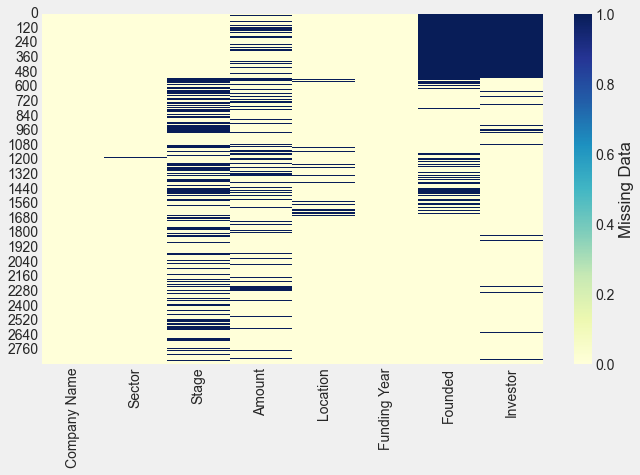

In [129]:
plt.figure(figsize=(10,6))
sns.heatmap(startup_funding_Full.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [130]:
startup_funding_Full.isnull().sum()

Company Name      0
Sector           18
Stage           931
Amount          550
Location        114
Funding Year      0
Founded         768
Investor        625
dtype: int64

In [131]:
# drop the NaN values
startup_funding_Full = startup_funding_Full.dropna()

<AxesSubplot:>

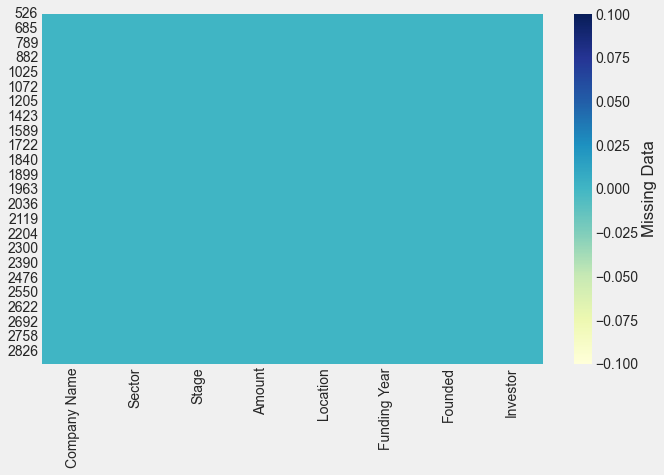

In [134]:
plt.figure(figsize=(10,6))
sns.heatmap(startup_funding_Full.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [132]:
startup_funding_Full.isnull().sum()

Company Name    0
Sector          0
Stage           0
Amount          0
Location        0
Funding Year    0
Founded         0
Investor        0
dtype: int64

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

##### Analysis of the Amount  attribute 

In [133]:
startup_funding_Full['Amount']

526     1.500000e+08
528     3.000000e+07
532     1.000000e+06
534     2.750000e+08
537     5.000000e+06
542     1.500000e+07
550     1.500000e+06
551     5.500000e+06
553     1.200000e+07
560     4.940000e+07
561     3.200000e+07
563     1.500000e+05
565     2.000000e+06
575     3.000000e+07
576     4.000000e+06
578     1.000000e+06
593     2.500000e+07
597     7.000000e+07
598     6.000000e+07
603     2.100000e+06
611     5.000000e+06
615     1.000000e+05
619     6.000000e+05
620     6.000000e+05
622     4.500000e+07
623     1.000000e+06
624     2.000000e+06
631     7.500000e+06
639     1.000000e+07
644     2.100000e+07
647     1.000000e+06
648     5.600000e+05
650     4.000000e+05
651     2.750000e+05
652     2.000000e+07
657     1.500000e+07
662     5.100000e+06
663     5.000000e+05
665     2.300000e+06
668     7.000000e+05
669     5.000000e+05
672     1.000000e+06
681     1.000000e+06
684     9.000000e+06
685     2.100000e+07
687     4.000000e+07
689     1.200000e+06
690     7.500

Mean:  20527610.088005725
Median:  3450000.0
Mode:  0    1000000.0
Name: Amount, dtype: float64
Standard Deviation:  55746259.56661475
Minimum Value:  42.23
Maximum Value:  1000000000.0


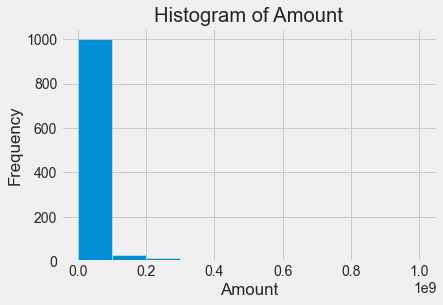

In [135]:

# calculate basic statistical measures
mean = startup_funding_Full['Amount'].mean()
median = startup_funding_Full['Amount'].median()
mode = startup_funding_Full['Amount'].mode()
std_dev = startup_funding_Full['Amount'].std()
min_val = startup_funding_Full['Amount'].min()
max_val = startup_funding_Full['Amount'].max()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std_dev)
print("Minimum Value: ", min_val)
print("Maximum Value: ", max_val)

# create a histogram
plt.hist(startup_funding_Full['Amount'])
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()


<AxesSubplot:xlabel='Amount', ylabel='Count'>

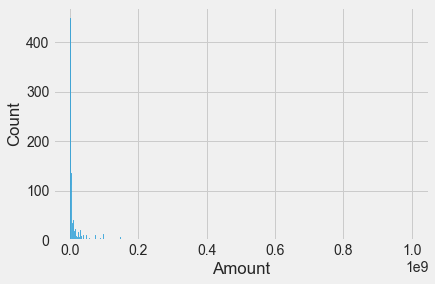

In [138]:
#startup_funding_Full.dropna(subset=['Amount'], inplace=True)
#sns.histplot(startup_funding_Full['Amount'])

# select a random subset of 10% of the rows
subset = startup_funding_Full.sample(frac=1, random_state=1)

# create a histogram of the Amount column
sns.histplot(subset['Amount'])

<AxesSubplot:xlabel='Amount'>

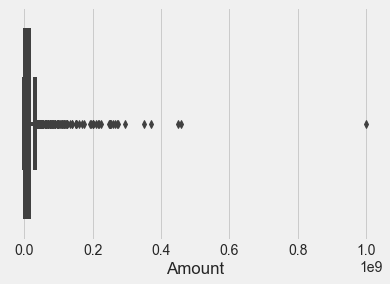

In [141]:
#sns.boxplot(startup_funding_Full['Amount'])
#sns.boxplot(subset['Amount'])

sns.boxplot(data=startup_funding_Full, x='Amount')


<AxesSubplot:xlabel='Amount', ylabel='Density'>

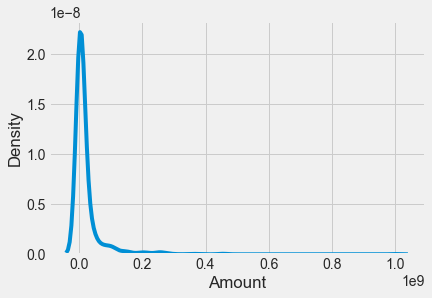

In [142]:
sns.kdeplot(startup_funding_Full['Amount'])

In [144]:

# calculate z-scores
z_scores = stats.zscore(startup_funding_Full['Amount'])

# find the indices of the outliers
outliers = np.where(z_scores > 3)[0]
outliers

array([  3,  63, 340, 349, 351, 398, 400, 430, 450, 508, 554, 671, 683,
       687, 712, 754, 757, 867, 868, 881, 909, 926, 942, 979], dtype=int64)

In [145]:
# remove the outliers
startup_funding_Full = startup_funding_Full.drop(startup_funding_Full.index[outliers])

<AxesSubplot:xlabel='Amount'>

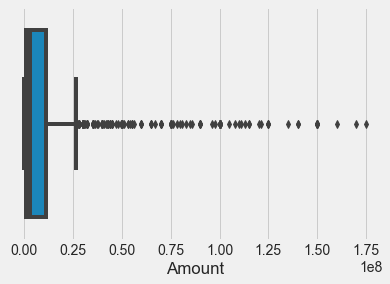

In [149]:
sns.boxplot(data=startup_funding_Full, x='Amount')

##### Analysis of the Founded  attribute 

Mean:  2016.685546875
Median:  2017.0
Mode:  0    2020.0
Name: Founded, dtype: Float64
Standard Deviation:  3.583761859450104
Minimum Value:  1982.0
Maximum Value:  2021.0


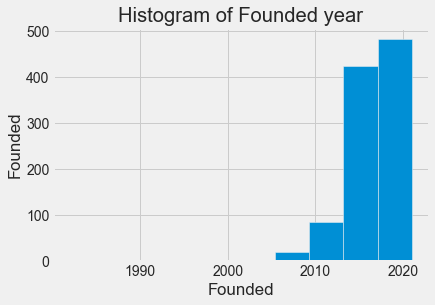

In [147]:
#startup_funding_Full.dropna(subset=['Founded'], inplace=True)

# calculate basic statistical measures
mean = startup_funding_Full['Founded'].mean()
median = startup_funding_Full['Founded'].median()
mode = startup_funding_Full['Founded'].mode()
std_dev = startup_funding_Full['Founded'].std()
min_val = startup_funding_Full['Founded'].min()
max_val = startup_funding_Full['Founded'].max()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std_dev)
print("Minimum Value: ", min_val)
print("Maximum Value: ", max_val)

# create a histogram
plt.hist(startup_funding_Full['Founded'])
plt.xlabel('Founded')
plt.ylabel('Founded')
plt.title('Histogram of Founded year')
plt.show()


<AxesSubplot:xlabel='Founded'>

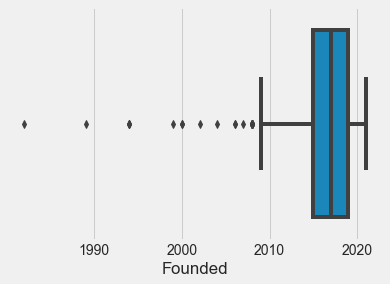

In [150]:
#sns.boxplot(startup_funding_Full['Founded'])
sns.boxplot(data=startup_funding_Full, x='Founded')

##### Analysis of the Stage  attribute 

In [154]:
startup_funding_Full['Stage'].head()

526        Series C
528        Series D
532    Pre series A
537        Series A
542        Series B
Name: Stage, dtype: object

In [156]:
(startup_funding_Full["Stage"].value_counts(normalize=True)*100).head()

Seed            23.437500
Series A        17.871094
Pre-series A    16.015625
Series B         8.593750
Series C         8.496094
Name: Stage, dtype: float64

In [157]:
(startup_funding_Full["Stage"].value_counts(normalize=True)*100).tail()

Pre series C    0.097656
Seed A          0.097656
Series E2       0.097656
Series B+       0.097656
Series I        0.097656
Name: Stage, dtype: float64

This will create a donut chart that shows the top 5 values of the 'Stage' column, with the size of each section representing the count of occurrences for that stage. The hole in the middle of the donut represents the percentage of the remaining stages that are not shown in the top 5.

In [158]:


import plotly.express as px

# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
stage_counts = startup_funding_Full.groupby('Stage')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
top_5_stages = stage_counts.sort_values(by='Amount', ascending=False).head(5)

# Create the donut chart
fig = px.pie(top_5_stages, values='Amount', names='Stage', hole=.4)
fig.show()


##### Analysis of the Sector attribute 

In [160]:
startup_funding_Full['Sector'].head()

526             Edtech
528    Interior design
532         Technology
537            Fintech
542            Fintech
Name: Sector, dtype: object

In [161]:
(startup_funding_Full["Stage"].value_counts(normalize=True)*100).head()

Seed            23.437500
Series A        17.871094
Pre-series A    16.015625
Series B         8.593750
Series C         8.496094
Name: Stage, dtype: float64

In [162]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Sector_counts = startup_funding_Full.groupby('Sector')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Sector_counts = Sector_counts.sort_values(by='Amount', ascending=False).head(5)

# Create the donut chart
fig = px.pie(Sector_counts, values='Amount', names='Sector', hole=.4)

fig.show()


##### Analysis of the Location attribute 

In [165]:
startup_funding_Full['Location'].head()

526       Mumbai
528      Chennai
532        Noida
537      Chennai
542    Bangalore
Name: Location, dtype: object

In [166]:
(startup_funding_Full["Location"].value_counts(normalize=True)*100).head()

Bangalore    35.839844
Mumbai       15.625000
Gurugram     12.695312
New Delhi     8.398438
Chennai       4.199219
Name: Location, dtype: float64

In [168]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Location_counts = startup_funding_Full.groupby('Location')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Location_counts = Location_counts.sort_values(by='Amount', ascending=False).head(5)

# Create the donut chart
fig = px.pie(Location_counts, values='Amount', names='Location', hole=.4)

fig.show()


##### Analysis of the Investor attribute 

In [169]:
startup_funding_Full['Investor'].head()

526                                     General Atlantic
528    Evolvence India Fund (EIF), Pidilite Group, FJ...
532           Gilda VC, Art Venture, Rajeev Chitrabhanu.
537                                           Oikocredit
542                                       Goldman Sachs.
Name: Investor, dtype: object

In [171]:
(startup_funding_Full["Investor"].value_counts(normalize=True)*100).head()

Inflection Point Ventures    2.343750
Venture Catalysts            0.976562
Tiger Global                 0.781250
Sequoia Capital India        0.683594
Kalaari Capital              0.585938
Name: Investor, dtype: float64

In [172]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Investor_counts = startup_funding_Full.groupby('Investor')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Investor_counts = Investor_counts.sort_values(by='Amount', ascending=False).head(5)

# Create the donut chart
fig = px.pie(Investor_counts, values='Amount', names='Investor', hole=.4)

fig.show()


## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

In [235]:
grouped_data = startup_funding_Full.groupby('Sector')
amount_stats = grouped_data['Amount'].agg(['mean', 'median', 'std'])

In [236]:
print(amount_stats.head(10))

                     mean   median      std
Sector                                     
advertisement     1800000  1800000      NaN
aeorspace         1800000  1800000      NaN
agri tech          500000   500000      NaN
agriculture      20000000 20000000      NaN
agritech         14871903  3800000 32226014
agritech startup  5060000  5060000      NaN
ai                1516000   600000  2073808
ai chatbot        7500000  7500000      NaN
ai company        5500000  5500000   707107
ai platform       8000000  8000000      NaN


In [237]:
print(amount_stats.tail(10))

                           mean   median  std
Sector                                       
travel                 49400000 49400000  NaN
vehicle repair startup  1000000  1000000  NaN
veterinary              5500000  5500000  NaN
video                  15000000 15000000  NaN
video communication     3000000  3000000  NaN
video personalization   4000000  4000000  NaN
virtual banking         2100000  2100000  NaN
water purification      1600000  1600000  NaN
wholesale               3500000  3500000  NaN
wl & rac protection      900000   900000  NaN


C:\Users\user\AppData\Local\Temp\ipykernel_6908\2309851250.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

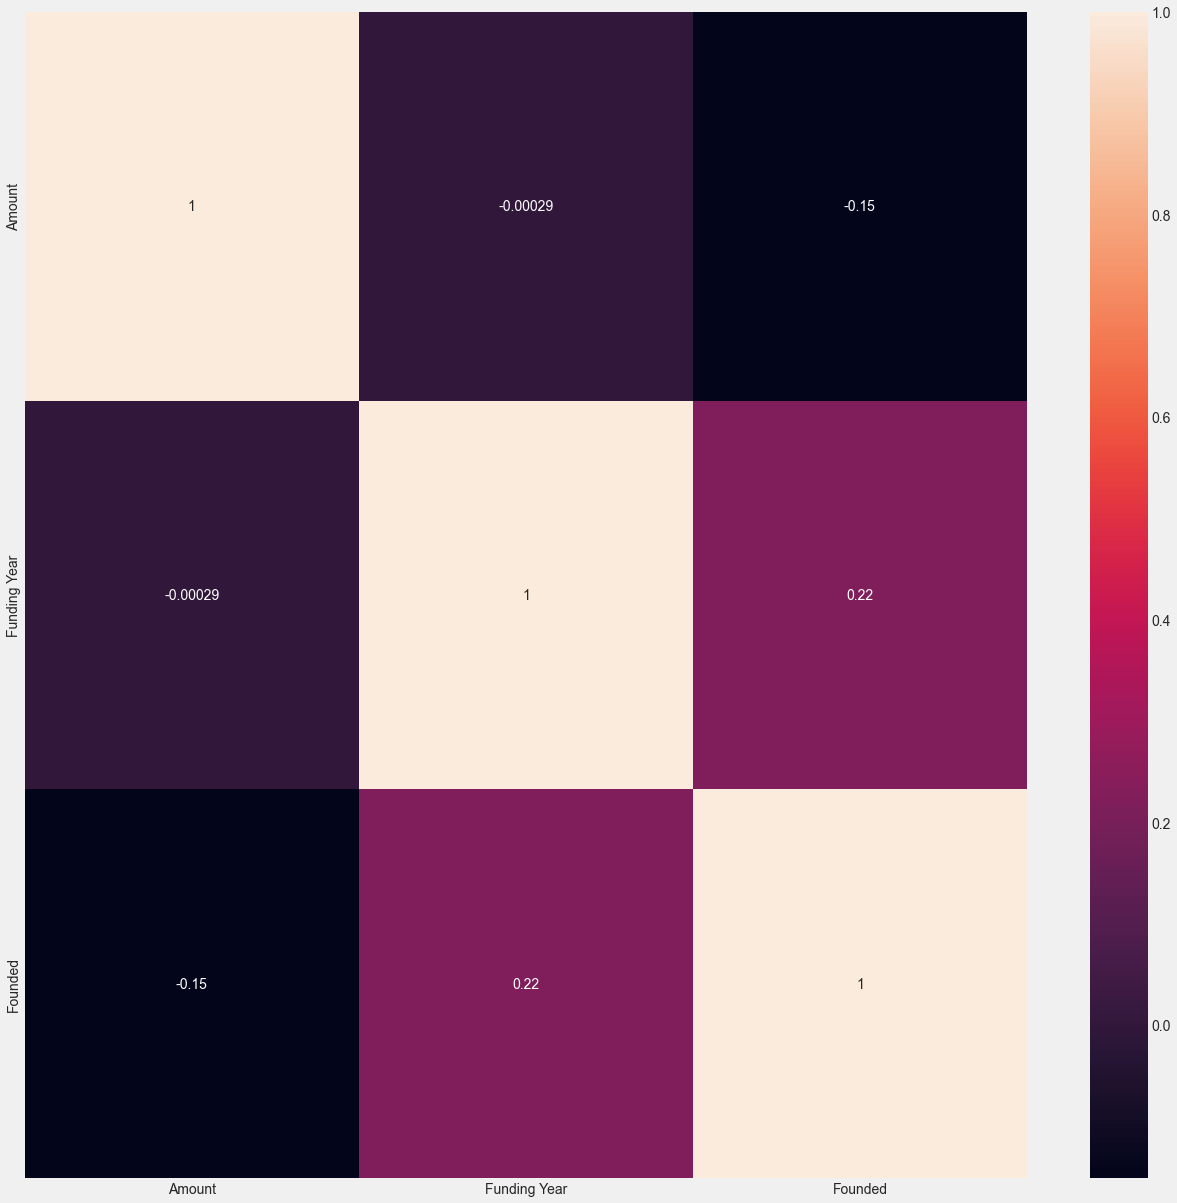

In [173]:
#Check correlation between various attributes in the datatset
correlation = startup_funding_Full.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation, annot = True)

In [174]:
#employee_df.corr()
corr_matrix=startup_funding_Full.corr()

corr_matrix

C:\Users\user\AppData\Local\Temp\ipykernel_6908\3451756028.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Amount  Funding Year   Founded
Amount        1.000000     -0.000291 -0.151230
Funding Year -0.000291      1.000000  0.218845
Founded      -0.151230      0.218845  1.000000

In [175]:
corr_matrix["Amount"].sort_values(ascending=False)

Amount          1.000000
Funding Year   -0.000291
Founded        -0.151230
Name: Amount, dtype: float64

<AxesSubplot:xlabel='Amount', ylabel='Funding Year'>

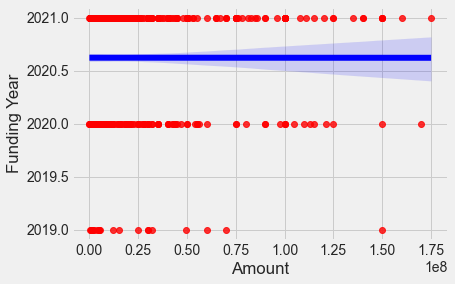

In [177]:
sns.regplot(x='Amount', y='Funding Year', data=startup_funding_Full, scatter_kws={'color':'red'}, line_kws={'color':'blue'})


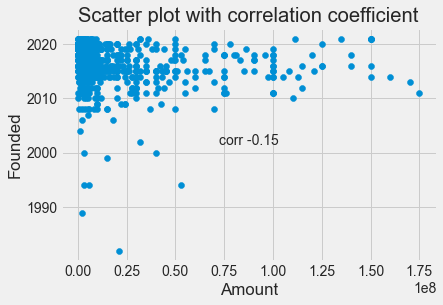

In [180]:
x = startup_funding_Full['Amount']
y = startup_funding_Full['Founded']

corr, _ = pearsonr(x, y)
plt.scatter(x, y)
plt.xlabel('Amount')
plt.ylabel('Founded')
plt.title('Scatter plot with correlation coefficient')
plt.annotate(f'corr {corr:.2f}', (0.5, 0.5), xycoords='axes fraction', ha='center')
plt.show()


# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

In [182]:
# 

startup_funding_Full["Startup_Age"] = startup_funding_Full["Funding Year"] - startup_funding_Full["Founded"]

In [183]:
#
startup_funding_Full.head()

Company Name           Sector         Stage       Amount   Location  \
526    Ruangguru           Edtech      Series C  150000000.0     Mumbai   
528     HomeLane  Interior design      Series D   30000000.0    Chennai   
532     Kratikal       Technology  Pre series A    1000000.0      Noida   
537   Kaleidofin          Fintech      Series A    5000000.0    Chennai   
542   Zest Money          Fintech      Series B   15000000.0  Bangalore   

     Funding Year  Founded                                           Investor  \
526          2019   2014.0                                   General Atlantic   
528          2019   2014.0  Evolvence India Fund (EIF), Pidilite Group, FJ...   
532          2019   2013.0         Gilda VC, Art Venture, Rajeev Chitrabhanu.   
537          2019   2018.0                                         Oikocredit   
542          2019   2015.0                                     Goldman Sachs.   

     Startup_Age  
526          5.0  
528          5.0  
532          6.0  
537          1.0  
542          4.0

<AxesSubplot:>

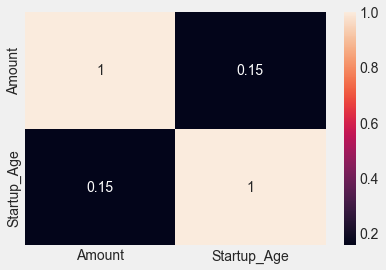

In [184]:
# 

corr = startup_funding_Full[['Amount', 'Startup_Age']].corr()
sns.heatmap(corr, annot=True)


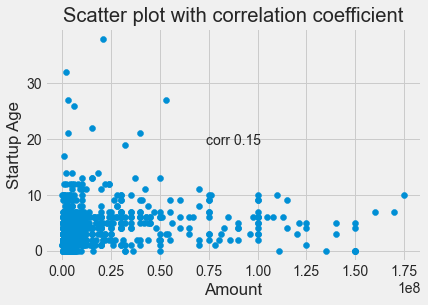

In [186]:
x = startup_funding_Full['Amount']
y = startup_funding_Full['Startup_Age']

corr, _ = pearsonr(x, y)
plt.scatter(x, y)
plt.xlabel('Amount')
plt.ylabel('Startup Age')
plt.title('Scatter plot with correlation coefficient')
plt.annotate(f'corr {corr:.2f}', (0.5, 0.5), xycoords='axes fraction', ha='center')
plt.show()


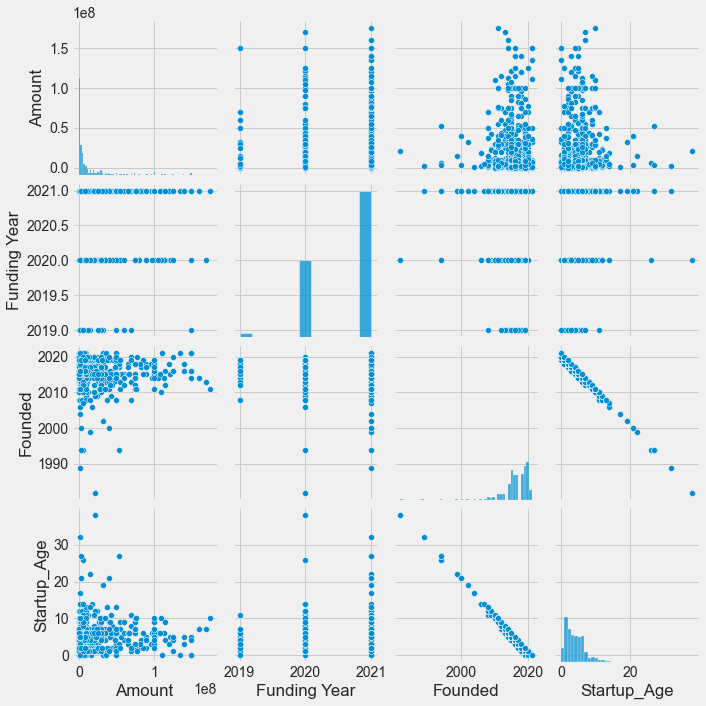

In [231]:
sns.pairplot(startup_funding_Full, vars=None, hue=None, diag_kind='auto', markers=None, plot_kws=None, diag_kws=None, grid_kws=None, height=2.5)

In [232]:
# Create a contingency table
table = pd.crosstab(startup_funding_Full['Sector'], startup_funding_Full['Stage'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Print the test statistic and p-value
print("Chi-square test statistic:", chi2)
print("p-value:", p)


Chi-square test statistic: 12840.678996816368
p-value: 0.004098730918617287


small p-value (typically less than 0.05) indicates that there is a significant association between the variables and that they are not independent

#### ANSWERING THE BUSINESS QUESTIONS 

QUESTION 1 

Does the type of industry affect the success of getting funded?

In [188]:
# The code above is trying to analyze the "Sector" column of a DataFrame named "startup_funding_Full" 
#and extract the most common words from it.

# Replace ',' and '&' with '' in the Sector column
sector_analysis = startup_funding_Full['Sector'].apply(lambda x: str(x).replace(',', ''))
sector_analysis = sector_analysis.apply(lambda x: str(x).replace('&', ''))
sector_analysis = sector_analysis.apply(lambda x: str(x).replace('startup', ''))
sector_analysis = sector_analysis.apply(lambda x: str(x).replace('technology', ''))

# Concatenate all the words in the sector_analysis series into a single string
txt = sector_analysis.str.lower().str.cat(sep=' ')

words = txt.split()

# Create a dictionary to store the word counts
word_counts = {}

# Loop through the list of words and update the count for each word
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1
        
# Sort the dictionary by the count and get the top 10 words
top_10 = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10])

print(top_10)


{'fintech': 113, 'edtech': 97, 'services': 67, 'tech': 39, 'financial': 39, 'e-commerce': 38, 'agritech': 34, 'food': 31, 'technology': 30, 'saas': 28}


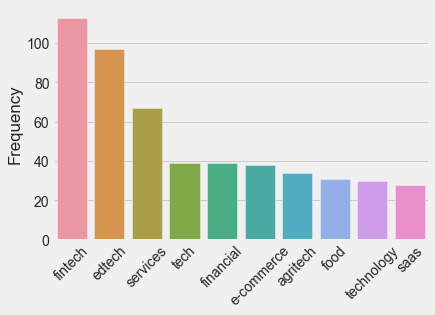

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the top 10 words and their frequencies
top_10_df = pd.DataFrame(top_10.items(), columns=["Word", "Frequency"])

# Use seaborn to create a bar chart
#sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='Word', y='Frequency', data=top_10_df)

# Adjust the plot properties
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [197]:
startup_funding_Full["Sector"] = startup_funding_Full["Sector"].str.lower()
#startup_funding_Full["Sector"].value_counts(normalize=True)*100
startup_funding_Full['Sector']

526                                edtech
528                       interior design
532                            technology
537                               fintech
542                               fintech
550                                  saas
551                  insurance technology
553                              foodtech
560                                travel
561                         manufacturing
563                         e-marketplace
565                          social media
575                             cosmetics
576                                   b2b
578                             jewellery
593                                  food
597                            automobile
598                             logistics
603                       virtual banking
611               automobile & technology
615                                edtech
619                              agritech
620                                edtech
622                               

In [198]:
startup_funding_Full.Sector = startup_funding_Full.Sector.astype(str)

#the list of keywords were generated from the list of top sectors 
#Tech and Technology were removed because they are too generic 

keywords = ["fintech", "edtech","services", "food","e-commerce", "health"]

keyword_totals = {}

for keyword in keywords:
    
    keyword_totals[keyword] = startup_funding_Full[startup_funding_Full['Sector'].apply(lambda x: keyword in x)].Amount.sum()
    
# keyword_totals is a dictionary that store the sum of amounts for a corresponding keyword


In [199]:
keyword_totals

{'fintech': 1881298000.0,
 'edtech': 1073057530.0,
 'services': 1320100000.0,
 'food': 434717300.0,
 'e-commerce': 688520000.0,
 'health': 1026710400.0}

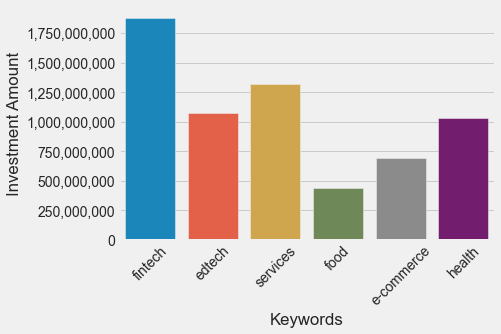

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a DataFrame with the keyword totals
keyword_totals_df = pd.DataFrame.from_dict(keyword_totals, orient='index', columns=['Amount'])

# Use seaborn to create a bar chart
ax=sns.barplot(x=keyword_totals_df.index, y='Amount', data=keyword_totals_df)

# format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Adjust the plot properties
plt.xlabel("Keywords")
plt.ylabel("Investment Amount")
plt.xticks(rotation = 45)

# Show the plot
plt.show()


QUESTION 2 

Can location affect the success of receiving funding from investors?

In [202]:
index_new = startup_funding_Full.index[startup_funding_Full['Location']=='California']
#index_new
Location_data = startup_funding_Full.drop(labels=index_new, axis=0)

In [205]:
Location_grp = Location_data.groupby('Location')['Amount'].sum().reset_index()
top_10_locations = Location_grp.sort_values(by = 'Amount', ascending = False).head(10)
top_5_locations = Location_grp.sort_values(by = 'Amount', ascending = False).head(5)
top_10_locations

Location        Amount
5   Bangalore  6.559479e+09
33     Mumbai  2.056873e+09
22   Gurugram  1.448764e+09
35  New Delhi  8.667850e+08
12    Chennai  5.982130e+08
43       Pune  5.305010e+08
60      Thane  2.587250e+08
24  Hyderabad  2.279800e+08
2   Ahmedabad  2.072390e+08
38      Noida  1.904600e+08

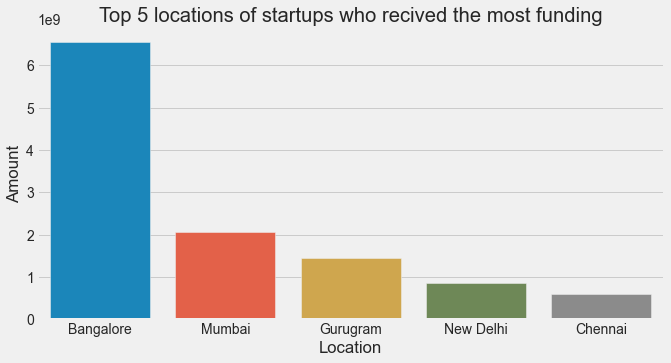

In [206]:
fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
#sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='Location', y='Amount', data=top_5_locations)

# Add labels and title
plt.xlabel("Location")
plt.ylabel("Amount")
plt.title("Top 5 locations of startups who recived the most funding")

# format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Show the plot
plt.show()


QUESTION 3: 

At which stage do start-ups get more funding from investors?

In [207]:
stage_data = startup_funding_Full.groupby('Stage')['Amount'].sum().reset_index()
top_5_stages = stage_data.sort_values(by = 'Amount', ascending = False).head()
top_5_stages

Stage        Amount
35  Series C  4.153491e+09
37  Series D  2.373870e+09
31  Series B  2.252854e+09
27  Series A  2.017727e+09
39  Series E  8.455530e+08

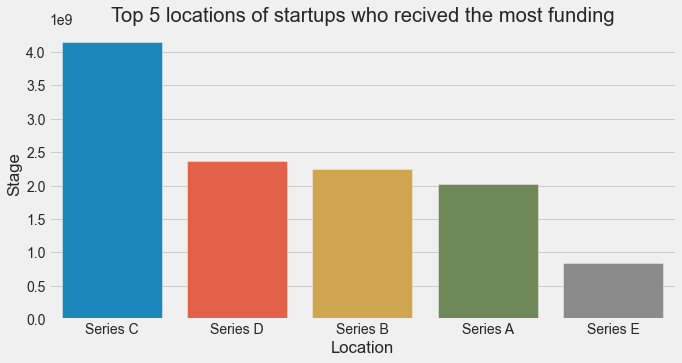

In [208]:
#Visualizing the results of the top 5 stages 

fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(x='Stage', y='Amount', data=top_5_stages)

# Add labels and title
plt.xlabel("Location")
plt.ylabel("Stage")
plt.title("Top 5 locations of startups who recived the most funding")

# format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


# Show the plot
plt.show()


In [210]:
#startup_funding_Full["Investor"].value_counts(normalize=True)*100
Investor_data = startup_funding_Full.groupby('Investor')['Amount'].sum().reset_index()
Investor_data = Investor_data.sort_values(by = 'Amount', ascending = False)
#top_10_investors
Investor_5_data = Investor_data.head()
Investor_5_data

Investor       Amount
727                Tiger Global  663000000.0
711             TVS Motor, Zoho  300000000.0
308              ICONIQ Capital  215000000.0
39    Accel Partners, B Capital  202500000.0
560  Qatar Investment Authority  175000000.0

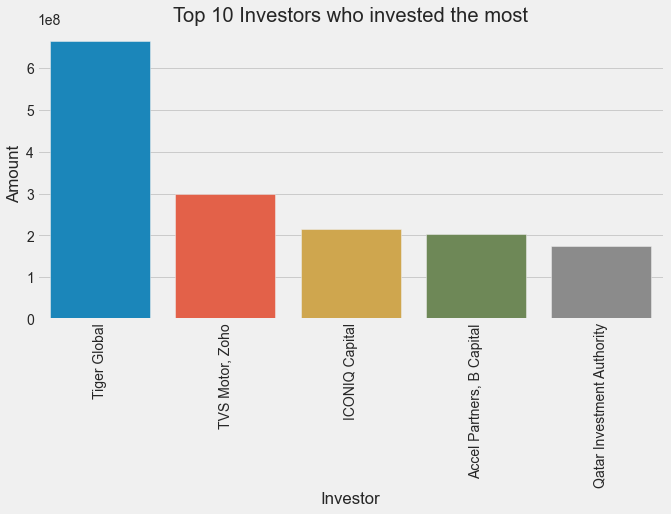

In [212]:
fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(x='Investor', y='Amount', data=Investor_5_data)

# Add labels and title
plt.xlabel("Investor")
plt.ylabel("Amount")
plt.title("Top 10 Investors who invested the most")

# Rotate y-labels by 30 degrees
#ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


# set y ticks and labels
plt.xticks(rotation = 90)

# Show the plot
plt.show()


In [213]:
#Here we are trying to extract the top 3 sectors with most count of Investors

# Merge the top_10_investors DataFrame with the startup_funding_Full DataFrame on the 'Investor' column
merged_df = pd.merge(Investor_data, startup_funding_Full, on='Investor')

# Group the merged DataFrame by the 'Sector' column and count the occurrences of each sector
investor_sectors = merged_df.groupby('Sector')['Investor'].count()

# Reset the index of the resulting DataFrame and sort the values by count in descending order
investor_sectors = investor_sectors.reset_index().sort_values(by='Investor', ascending=False).head(3)

#print(investor_sectors)

investor_sectors


Sector  Investor
120             fintech       113
98               edtech        93
119  financial services        39

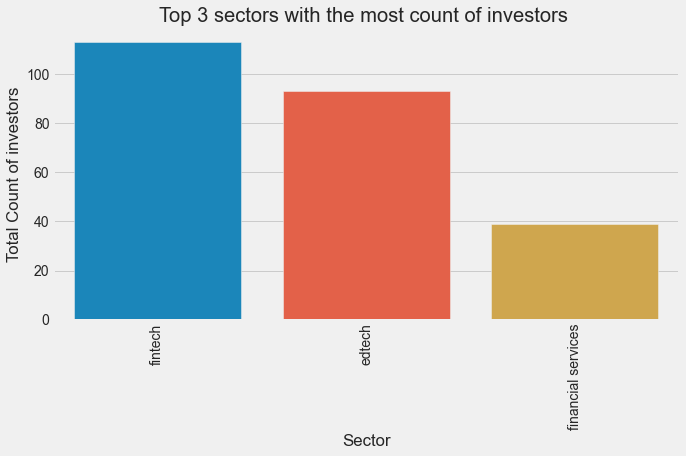

In [216]:
fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(x='Sector', y='Investor', data=investor_sectors)

# Add labels and title
plt.xlabel("Sector")
plt.ylabel("Total Count of investors")
plt.title("Top 3 sectors with the most count of investors ")

# Rotate y-labels by 30 degrees
#ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


# set y ticks and labels
plt.xticks(rotation = 90)

# Show the plot
plt.show()


QUESTION 5

Can the age of the startup affect the sum of money received from investors ?

In [217]:
#stage_data = startup_funding_Full.groupby('Stage')['Amount'].sum().reset_index()
#top_10_stages = stage_data.sort_values(by = 'Amount', ascending = False).head(10)
#top_10_stages

top_Startup_Age = startup_funding_Full.groupby("Startup_Age")["Amount"].sum().reset_index()
top_10_Startup_Age = top_Startup_Age.sort_values(by = 'Amount', ascending = False).head(5)
top_10_Startup_Age

Startup_Age        Amount
6          6.0  2.314688e+09
5          5.0  1.837574e+09
4          4.0  1.661321e+09
3          3.0  1.491681e+09
2          2.0  1.374853e+09

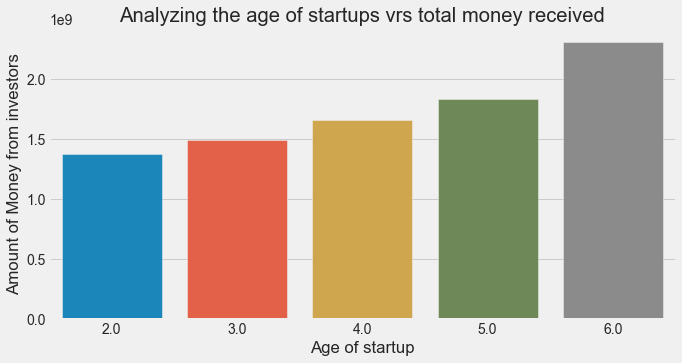

In [218]:
fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(x='Startup_Age', y='Amount', data=top_10_Startup_Age)

# Add labels and title
plt.xlabel("Age of startup")
plt.ylabel("Amount of Money from investors")
plt.title("Analyzing the age of startups vrs total money received")

# Rotate y-labels by 30 degrees
#ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


# set y ticks and labels
#plt.xticks(rotation = 90)

# Show the plot
plt.show()


## Hypothesis: 

###### NULL: Technological industries do not have a higher success rate of being funded 

###### ALTERNATE: Technological industries have a higher success rate of being funded


Since our hypothesis focuses on two groups i.e Technological and Non-Technological. We decided to create a list which contains keywords associated with techology like Fintech, edtech, robotics etc. This is generated manually by skimming through the sector attribute of the full datatset 

In [220]:

# Define the keywords
keywords = ["fintech", "edtech", "e-commerce","robotics", "cryptocurrency", "esports",
            "automotive ", "engineering ","telecommunications", "electricity", 
            "agritech", "healthtech", "technology", "e-marketplace", "social", 
            "tech", "gaming", "computer", "femtech", "solar", "embedded ", 
            "software ", "saas ", "e-commerce", "analytics", "ar", "vr", "crm", "nft", 
            "e-learning", "iot", "e-commerce", "e-mobility", "api ", 
            "ecommerce", "media", "ai","sportstech", "traveltech", "online", 
            "information", "automobile", "e-commerce", "biotechnology", "applications",  
            "it", "edtech", "energy", "computer", "agritech", "online ", "virtual ", 
            "fintech", "internet", "automation", "cloud", "apps", "chatbot", 
            "digital", "cleantech", "ev", "manufacturing","networking", "mobile ", 
            "electronics", "logitech", "solar", "insurtech","finance", "electric", 
            "fmcg", "intelligence", "blockchain","crypto", "foodtech ", "audio ", 
            "nanotechnology", "biometrics", "auto-tech", "biotech", "data ",  "autonomous ", 
            "AI", "machine learning", "e-market", "proptech", "machine learning "]


In [221]:
def check_keywords(string, keywords):
    for keyword in keywords:
        if keyword in string:
            return "technology"
    return "non-technology"

In [222]:
# Select only the rows with non-null values in the Sector column
startup_funding_Full = startup_funding_Full[startup_funding_Full["Sector"].notnull()]

# Convert the Sector column to a Pandas Series
sector_series = pd.Series(startup_funding_Full["Sector"])

#startup_funding_Full["Sector"].str.apply(check_keywords, keywords=keywords)

# Apply the check_keywords function to the Series
sector_series = sector_series.apply(check_keywords, keywords=keywords)

# Convert the resulting Series back to a column in the startup_funding_Full DataFrame
startup_funding_Full["label"] = sector_series


In [223]:
#Count the occurance of each unique term in the label column 

startup_funding_Full["label"].value_counts(normalize=True)*100

technology        77.246094
non-technology    22.753906
Name: label, dtype: float64

([<matplotlib.patches.Wedge at 0x21ca93ba5e0>,
 [Text(-0.8307215145861901, 0.7210421382995772, 'Technology '),
  Text(0.8307215145861903, -0.721042138299577, 'Non-technology ')],
 [Text(-0.4531208261379218, 0.39329571179976935, '77.2%'),
  Text(0.45312082613792193, -0.3932957117997692, '22.8%')])

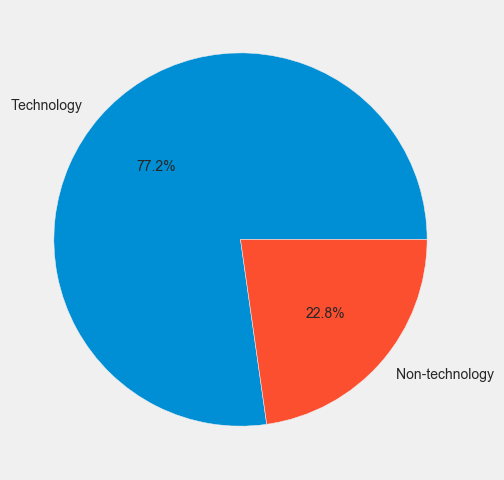

In [224]:
#A pie chart to show the distribution of the two labels 

plt.subplots(figsize = (10,8))
label = ['Technology ', 'Non-technology ']
label_data = startup_funding_Full["label"].value_counts()

plt.pie(label_data, labels=label, autopct='%1.1f%%')

In [225]:
# Set the float format to a custom function that formats the number as a string without the exponential notation

pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))

group_obj = startup_funding_Full["Amount"].groupby(startup_funding_Full["label"]).agg(['max','mean', 'sum'])

group_obj

max     mean         sum
label                                        
non-technology 150000000 16756789  3904331742
technology     175000000 13276364 10501603630

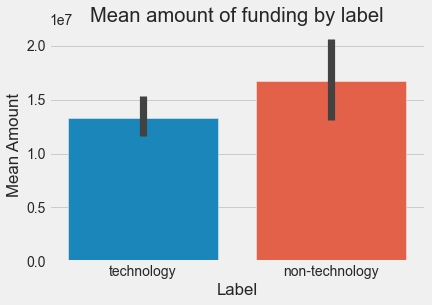

In [227]:

# Create a bar chart of the mean 'Amount' grouped by 'label'
sns.barplot(x='label', y='Amount', data=startup_funding_Full, estimator=np.mean)

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Mean Amount")
plt.title("Mean amount of funding by label")

# Show the plot
plt.show()


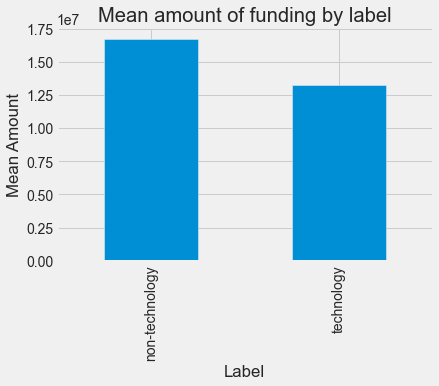

In [228]:
mean_value = startup_funding_Full["Amount"].groupby(startup_funding_Full["label"]).mean().plot.bar()

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Mean Amount")
plt.title("Mean amount of funding by label")

# Show the plot
plt.show()

ALTERNATE: Technological industries have a higher success rate of being funded is true. Technological industries have recived 

### MAJOR TAKEAWAY

Major Takeaway: 
    
Fintech and edtech are two of the most active sectors in the Indian startup ecosystem, and Mumbai is at the forefront of these developments. 